In [1]:
!pip install rasterio

     |████████████████████████████████| 18.2MB 164kB/s 


In [2]:
import rasterio
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

Following Python Quickstart guide at https://rasterio.readthedocs.io/en/latest/quickstart.html

In [4]:
# open dataset
dataset = rasterio.open('puget_sound.tif')

##Attributes

In [5]:
# Number of bands
dataset.count

3

In [6]:
print('Width: {} \nHeight: {}'.format(dataset.width, dataset.height))

Width: 5490 
Height: 5490


In [7]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint8', 2: 'uint8', 3: 'uint8'}

In [8]:
dataset.bounds

BoundingBox(left=499980.0, bottom=5290200.0, right=609780.0, top=5400000.0)

##Plot RGB bands

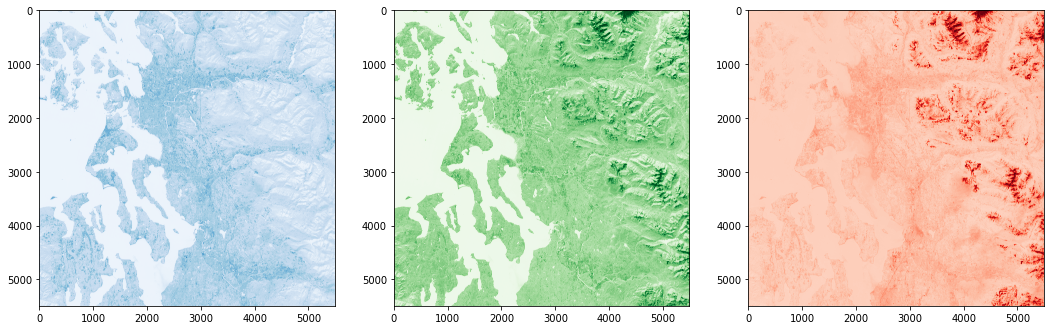

In [9]:
band = [dataset.read(i) for i in dataset.indexes]

fig = plt.figure(figsize = (18,7))
c = ['Blues', 'Greens', 'Reds']

for i in range(len(dataset.indexes)):
  ax = fig.add_subplot(1,3,i+1)
  ax.imshow(band[i], cmap = c[i])

plt.show()

##TensorFlow/Keras

In [10]:
img = tf.keras.preprocessing.image.load_img('puget_sound.tif')

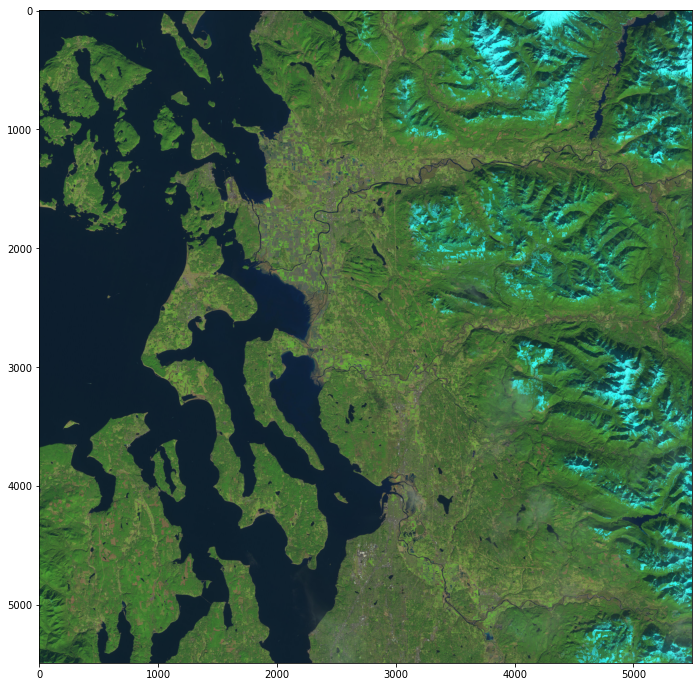

In [11]:
fig = plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

In [12]:
img_array = tf.keras.preprocessing.image.img_to_array(img)/255

In [13]:
tf.shape(img_array)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5490, 5490,    3], dtype=int32)>

Image Manipulation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


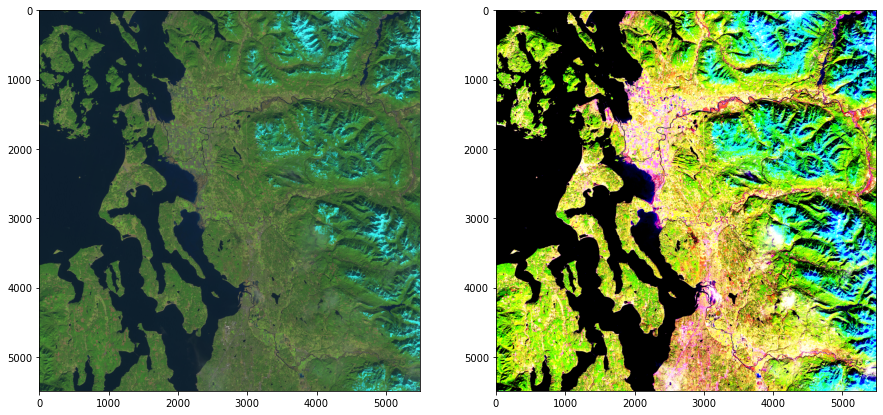

In [34]:
contrast = tf.image.adjust_contrast(img_array, 10.)

fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(1,2, 1)
ax.imshow(img)

ax = fig.add_subplot(1,2, 2)
ax.imshow(contrast)

plt.show()

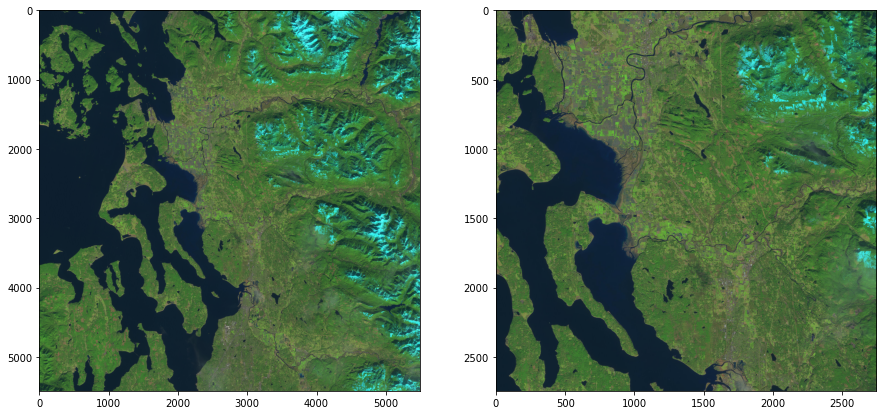

In [35]:
crop = tf.image.central_crop(img_array, 0.5)

fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(1,2, 1)
ax.imshow(img)

ax = fig.add_subplot(1,2, 2)
ax.imshow(crop)

plt.show()

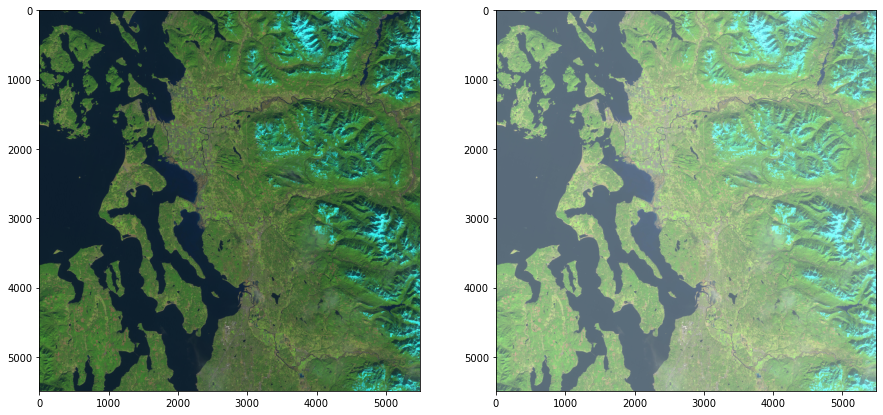

In [40]:
new_img = tf.keras.preprocessing.image.apply_channel_shift(
    img_array, .3, channel_axis=2)

fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(1,2, 1)
ax.imshow(img)

ax = fig.add_subplot(1,2, 2)
ax.imshow(new_img)

plt.show()